In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# load the data

X_train = np.loadtxt("data/seconds_1_overlap_0/data_Train.txt")
y_train = np.loadtxt("labels/seconds_1_overlap_0/labels_Train.txt")

X_val = np.loadtxt("data/seconds_1_overlap_0/data_Validation.txt")
y_val = np.loadtxt("labels/seconds_1_overlap_0/labels_Validation.txt")

X_test = np.loadtxt("data/seconds_1_overlap_0/data_Test.txt")
y_test = np.loadtxt("labels/seconds_1_overlap_0/labels_Test.txt")

In [3]:
y_test = np.loadtxt("labels/seconds_1_overlap_0/labels_Test.txt")

In [20]:
def convert_to_tuple(arr):
    zeros = np.zeros(arr.shape)
    
    tuples = np.array(list(zip(arr, np.zeros(zeros.shape))))
    
    mask = (tuples[:,0] == 0)
    
    tuples[mask, 1] = 1
    
    return tuples

y_val = convert_to_tuple(y_val)
y_test = convert_to_tuple(y_test)
y_train = convert_to_tuple(y_train)

In [ ]:
y_test = np.array(list(zip(y_test, np.zeros(y_test.shape))))

mask = (y_test[:,0] == 0)

y_test[mask,1] = 1

In [14]:
y_test

array([[[0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.]],

       [[0., 1.],
        [0., 1.]],

       ...,

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

width = X_train.shape[1]

In [ ]:
X_train = X_train.reshape((-1, 128, width))
X_val = X_val.reshape((-1, 128, width))
X_test = X_test.reshape((-1, 128, width))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

In [ ]:
index = 16000

plt.imshow(X_train[index], cmap ="gray")
plt.title(f"Label is {y_train[index]}")
plt.show()

In [ ]:
# resizing images

#data_padded = [data[i] for i in range(0, data.shape[0])]

#n_samples = data.shape[0]
#height = data.shape[1]
#width = data.shape[2]


#for i in range(0, n_samples):
#    for j in range(width, height):
#        data_padded[i] = np.append(data_padded[i], [[0] for k in range(0, height)], 1)
    
#data_padded = np.array(data_padded)
#data_padded.shape
#data = data_padded

In [21]:
X_train = X_train.reshape((-1, 128, 44, 1))
X_val = X_val.reshape((-1, 128, 44, 1))
X_test = X_test.reshape((-1, 128, 44, 1))

In [ ]:
# train test split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

(array([[11032.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 12245.],
        [12245.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 11032.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

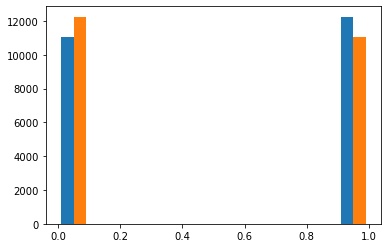

In [22]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [23]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4),
                        strides=1,
                        activation="relu",
                        input_shape=(128, 44, 1)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation="softmax"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 125, 41, 32)       544       
_________________________________________________________________
dropout (Dropout)            (None, 125, 41, 32)       0         
_________________________________________________________________
flatten (Flatten)            (None, 164000)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 328002    
Total params: 328,546
Trainable params: 328,546
Non-trainable params: 0
_________________________________________________________________


In [24]:
# normalize

X_train = X_train.astype("float32")/255.0
X_test = X_test.astype("float32")/255.0

In [ ]:
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [ ]:
y_train

np.zeros(y_train.shape)

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val, y_val),
)

Epoch 1/10
182/182 [==============================] - 41s 225ms/step - loss: 0.3708 - accuracy: 0.8913 - val_loss: 3.1128 - val_accuracy: 0.7946
Epoch 2/10
182/182 [==============================] - 41s 227ms/step - loss: 0.0848 - accuracy: 0.9707 - val_loss: 5.6873 - val_accuracy: 0.6280
Epoch 3/10
182/182 [==============================] - 41s 225ms/step - loss: 0.0795 - accuracy: 0.9710 - val_loss: 0.7825 - val_accuracy: 0.9485
Epoch 4/10
182/182 [==============================] - 41s 224ms/step - loss: 0.0589 - accuracy: 0.9784 - val_loss: 0.9201 - val_accuracy: 0.9388
Epoch 5/10
182/182 [==============================] - 41s 225ms/step - loss: 0.0468 - accuracy: 0.9831 - val_loss: 0.6372 - val_accuracy: 0.9579
Epoch 6/10
182/182 [==============================] - 40s 222ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 0.8778 - val_accuracy: 0.9424
Epoch 7/10
182/182 [==============================] - 41s 223ms/step - loss: 0.0375 - accuracy: 0.9872 - val_loss: 2.3131 - val_ac

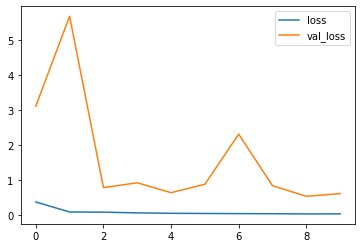

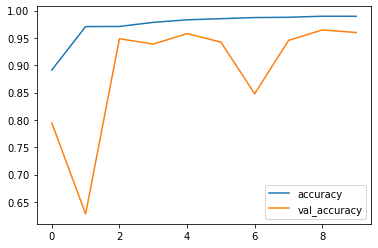

In [26]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()

In [40]:
test_audio = np.loadtxt("data/for_prediction/Olaf_Schubert/seconds_1_overlap_0/Olaf_Schubert_1/data.txt")

In [29]:
model.save('first_model_softmax.h5')

In [41]:
test_audio = test_audio.reshape((-1, 128, 44, 1))

In [31]:
predictions = model.predict(
    np.array(test_audio)
)

In [ ]:
sum(predictions == 0)

In [ ]:
model.save('first_model.h5')

In [ ]:
# load the model from disk
from tensorflow.keras.models import load_model
loaded_model = load_model('first_model.h5')

In [50]:
test_audio.shape

(1036, 128, 44, 1)

In [51]:
preds = model.predict(np.array(test_audio))

In [52]:
preds

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [61]:
mask = (preds[:,0] != 0)
preds[mask]

array([[9.9999988e-01, 7.4021436e-08]], dtype=float32)

In [64]:
np.argmax(preds[:,0])

123

In [67]:
preds[120:126]

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [9.9999988e-01, 7.4021436e-08],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)